In [ ]:
#Download dataset from Kaggle
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download daffafauzanazhari/bruised-facememar

bruised-facememar.zip: Skipping, found more recently modified local copy (use --force to force download)


# New Section

# New Section

In [ ]:
#import library

import os
import zipfile
import random
import tensorflow as tf
import csv
import numpy as np
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd


In [ ]:
!ls

201012_gma_llamas3_hpMain_16x9_992.jpg
bruised-facememar.zip
ddf8c6989e484c52456b9d868dfe5d9b.jpg
fb178f32-65a8-4c98-8b28-e6e159674cb8-Noah.jpg
jsr_SAH_260214wokingassault.jpg
kaggle.json
lamyportrait.1840x1328p50x50.png
puffy-swollen-eye-on-asian-260nw-548112610.jpg
sample_data


In [ ]:
#Dataset being extract and placed in directory
path_violence_and_nonviolence = f"{getcwd()}/bruised-facememar.zip"
#shutil.rmtree('/tmp')

local_zip = path_violence_and_nonviolence
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
!ls

201012_gma_llamas3_hpMain_16x9_992.jpg
bruised-facememar.zip
ddf8c6989e484c52456b9d868dfe5d9b.jpg
fb178f32-65a8-4c98-8b28-e6e159674cb8-Noah.jpg
jsr_SAH_260214wokingassault.jpg
kaggle.json
lamyportrait.1840x1328p50x50.png
puffy-swollen-eye-on-asian-260nw-548112610.jpg
sample_data


In [ ]:
# Dataset amount
print(len(os.listdir("/tmp/dataset/dataset/memar")))
print(len(os.listdir("/tmp/dataset/dataset/non-memar")))

92
113


In [ ]:
try:
  os.mkdir("/tmp/violence-v-nonviolence/")
  os.mkdir("/tmp/violence-v-nonviolence/training/")
  os.mkdir("/tmp/violence-v-nonviolence/testing/")
  os.mkdir("/tmp/violence-v-nonviolence/training/violence/")
  os.mkdir("/tmp/violence-v-nonviolence/training/nonviolence/")
  os.mkdir("/tmp/violence-v-nonviolence/testing/violence/")
  os.mkdir("/tmp/violence-v-nonviolence/testing/nonviolence/")
except OSError:
  pass

In [ ]:
!ls

201012_gma_llamas3_hpMain_16x9_992.jpg
bruised-facememar.zip
ddf8c6989e484c52456b9d868dfe5d9b.jpg
fb178f32-65a8-4c98-8b28-e6e159674cb8-Noah.jpg
jsr_SAH_260214wokingassault.jpg
kaggle.json
lamyportrait.1840x1328p50x50.png
puffy-swollen-eye-on-asian-260nw-548112610.jpg
sample_data


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    source_list = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))

    for file_number in range(len(source_list)):
          file_source = os.path.join(SOURCE, source_list[file_number-1])
          file_training = os.path.join(TRAINING, source_list[file_number-1])
          file_validation = os.path.join(TESTING, source_list[file_number-1])

          size = os.path.getsize(file_source)

          if (file_number)<(len(source_list)*SPLIT_SIZE):
              if size > 0:
                  copyfile(file_source, file_training)
          elif size > 0:
              copyfile(file_source, file_validation)



VIOLENCE_SOURCE_DIR = "/tmp/dataset/dataset/memar/"
TRAINING_VIOLENCE_DIR = "/tmp/violence-v-nonviolence/training/violence/"
TESTING_VIOLENCE_DIR = "/tmp/violence-v-nonviolence/testing/violence/"
NONVIOLENCE_SOURCE_DIR = "/tmp/dataset/dataset/non-memar/"
TRAINING_NONVIOLENCE_DIR = "/tmp/violence-v-nonviolence/training/nonviolence/"
TESTING_NONVIOLENCE_DIR = "/tmp/violence-v-nonviolence/testing/nonviolence/"

split_size = .7
split_data(VIOLENCE_SOURCE_DIR, TRAINING_VIOLENCE_DIR, TESTING_VIOLENCE_DIR, split_size)
split_data(NONVIOLENCE_SOURCE_DIR, TRAINING_NONVIOLENCE_DIR, TESTING_NONVIOLENCE_DIR, split_size)

In [ ]:
print(len(os.listdir("/tmp/violence-v-nonviolence/training/violence/")))
print(len(os.listdir("/tmp/violence-v-nonviolence/training/nonviolence/")))
print(len(os.listdir("/tmp/violence-v-nonviolence/testing/violence/")))
print(len(os.listdir("/tmp/violence-v-nonviolence/testing/nonviolence/")))

85
103
47
56


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation="relu"),

    tf.keras.layers.Dense(1, activation="sigmoid"),

])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR ="/tmp/violence-v-nonviolence/training/"
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range =40,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range =0.2,
    zoom_range =0.2,
    horizontal_flip =True,
    fill_mode = "nearest")

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=10, class_mode="binary", target_size=(150,150))

VALIDATION_DIR ="/tmp/violence-v-nonviolence/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=10, class_mode="binary", target_size=(150,150))

Found 188 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
19/19 [==============================] - 20s 1s/step - loss: 1.1490 - acc: 0.4741 - val_loss: 0.6261 - val_acc: 0.7476
Epoch 2/5
19/19 [==============================] - 18s 970ms/step - loss: 0.7325 - acc: 0.6567 - val_loss: 0.5236 - val_acc: 0.8738
Epoch 3/5
19/19 [==============================] - 18s 968ms/step - loss: 0.6843 - acc: 0.7289 - val_loss: 0.3151 - val_acc: 0.9029
Epoch 4/5
19/19 [==============================] - 18s 953ms/step - loss: 0.5297 - acc: 0.7676 - val_loss: 0.2183 - val_acc: 0.9417
Epoch 5/5
19/19 [==============================] - 18s 962ms/step - loss: 0.3403 - acc: 0.8773 - val_loss: 0.2218 - val_acc: 0.8835


Text(0.5, 1.0, 'Training and validation loss')

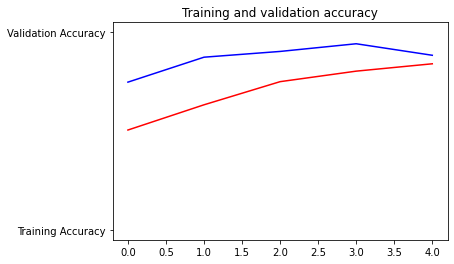

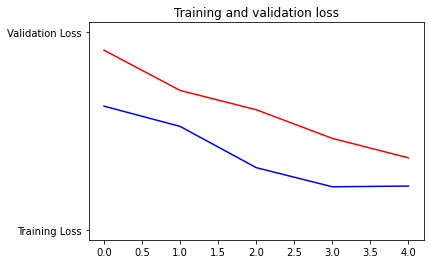

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a violence")
    
  else:
    print(fn + " is a non violence")
 

Saving puffy-swollen-eye-on-asian-260nw-548112610.jpg to puffy-swollen-eye-on-asian-260nw-548112610 (1).jpg
[1.]
puffy-swollen-eye-on-asian-260nw-548112610.jpg is a violence
